In [43]:
from standard_imports import *
import os 
from graph_convergence_gaa_1 import *
np.set_printoptions(precision = 15, linewidth=700, suppress=False)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [162]:
ML = 4
d_vec = np.array([1,1,0])

a = 2
b = 0


  0%|          | 0/10 [00:00<?, ?it/s]

2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0


 10%|█         | 1/10 [00:05<00:47,  5.28s/it]

2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0


 20%|██        | 2/10 [00:09<00:38,  4.79s/it]

2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0


 30%|███       | 3/10 [00:14<00:32,  4.69s/it]

2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0


 40%|████      | 4/10 [00:19<00:28,  4.76s/it]

2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0


 50%|█████     | 5/10 [00:24<00:25,  5.07s/it]

2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0


 60%|██████    | 6/10 [00:29<00:20,  5.03s/it]

2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0


 70%|███████   | 7/10 [00:35<00:16,  5.35s/it]

2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0


 80%|████████  | 8/10 [00:40<00:10,  5.27s/it]

2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0


 90%|█████████ | 9/10 [00:46<00:05,  5.24s/it]

2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0


100%|██████████| 10/10 [00:51<00:00,  5.18s/it]


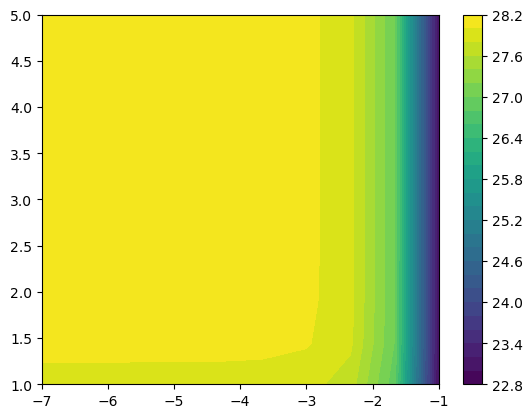

In [14]:
zeros = np.load(file_location(d_vec, ML))['zeros']
d_vec = np.array([1,0,0])
x = zeros[0]


resolution = 10
alpha = np.logspace(-1,-7,resolution)
cutoff = np.logspace(1,5, resolution)

A, C = np.meshgrid(alpha, cutoff, indexing='ij')
Z = np.zeros_like(A)
for i in tqdm(range(len(A))):
    for j in range(len(C)):
        Z[i,j] = limiting(a,b, d_vec, x, A[i,j],C[i,j],ML)
        #derivative(1, d_vec, x, A[i,j],C[i,j],ML) #limiting(a,b,d_vec, x, A[i,j], C[i,j], ML)



#extent = (np.log10(np.min(A)), np.log10(np.max(A)), np.log10(np.min(C)), np.log10(np.max(C)))

#plt.imshow(np.log10(102.83955351102952-Z), extent=extent, origin='lower', aspect='auto')

plt.contourf(np.log10(A), np.log10(C), Z, levels=30)
plt.colorbar()

plt.plot()
plt.show()



In [27]:

g_ab_large(2,0, d_vec, x, 1e6, 0, ML)

28.105936544624917

In [62]:
def deriv_tolarence(d_vec, ML, iterations):
    
    x = np.load(file_location(d_vec, ML))['zeros'][0]
    alpha = 0.01
    cutoff = 1e4
    value = derivative(1, d_vec, x, alpha, cutoff, ML )
    returned_value = value
    increasing_cut = True
    tolerence = 1e-4
    # results = np.array([])
    # cutoffs = np.array([])
    # alphas = np.array([])
    for i in range(iterations):
        if increasing_cut:
            cutoff = cutoff*1.5
            print('new ',cutoff)
            value_tmp = derivative(1, d_vec, x, alpha, cutoff, ML )
            if np.abs(value_tmp-value) < tolerence:
                increasing_cut = False
                # results = np.append(results, value_tmp)
                # cutoffs = np.append(cutoffs, cutoff)
                # alphas = np.append(alphas, alpha)
                returned_value = value_tmp
            value = value_tmp
        else:
            alpha = alpha/1.5
            print('new ',alpha)
            value_tmp = derivative(1, d_vec, x, alpha, cutoff, ML )
            if np.abs(value_tmp-value) > tolerence:
                increasing_cut = True

    return returned_value, cutoff, alpha #results, cutoffs, alphas

In [198]:
ML = 4
d_vec = np.array([2,0,0])

zeros = np.load(file_location(d_vec, ML))['zeros']
x = zeros[9]

print(x)

a = 1
b = 2

resolution = 6
alpha = np.logspace(-2,-4,resolution)
cutoff = np.logspace(4,5.7, resolution)

A, C = np.meshgrid(alpha, cutoff, indexing='xy')
Z = np.zeros_like(A)
for i in tqdm(range(len(A))):
    for j in range(len(C)):
        Z[i,j] = limiting(a,b, d_vec, x, A[i,j],C[i,j],ML)

4.918347097733665


  0%|          | 0/6 [00:00<?, ?it/s]

100%|██████████| 6/6 [03:36<00:00, 36.04s/it]


[[ 0  0]
 [ 1 -1]]


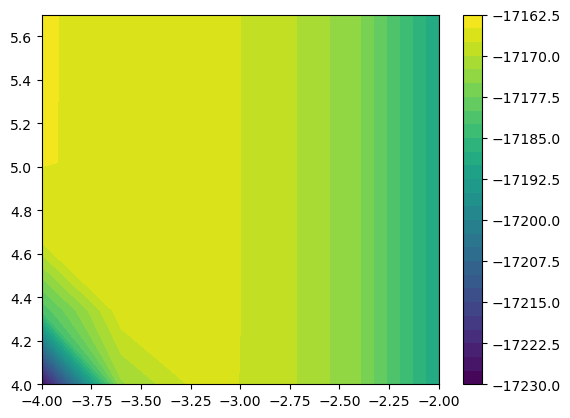

In [ ]:

plt.contourf(np.log10(A), np.log10(C), Z, levels=30)
plt.colorbar()

plt.plot()
plt.show()

In [ ]:
limiting(a,b, d_vec, x, 1e-5, 2e6,ML)

10.33751906517864

In [ ]:
limiting(a,b, d_vec, x, 1e-5, 3e6,ML)

10.337526674184119

In [194]:
print(Z)

[[-17190.12532191639  -17174.799214924522 -17168.699889740332 -17166.391105228064 -17172.978443013144 -17228.105300129708]
 [-17190.125321916385 -17174.799214924526 -17168.69987735565  -17166.272139987064 -17165.711717180046 -17181.915050590982]
 [-17190.125321916385 -17174.799214924526 -17168.69987735565  -17166.27201945166  -17165.30647647702  -17166.189472455797]
 [-17190.125321916385 -17174.799214924526 -17168.69987735565  -17166.272019451597 -17165.305524450734 -17164.926968033466]
 [-17190.125321916385 -17174.799214924526 -17168.69987735565  -17166.272019451597 -17165.30552444801  -17164.920764286115]
 [-17190.125321916385 -17174.799214924526 -17168.69987735565  -17166.272019451597 -17165.30552444801  -17164.920764199353]]


In [196]:
(-17165.30552444801 - -17164.920764199353)/(-17165.30552444801)

2.241499564972343e-05

In [166]:
17.015216260589114 -   17.01623749142891

-0.0010212308397967718

In [109]:
print(C)

[[ 10000.              10000.              10000.              10000.              10000.              10000.            ]
 [ 21877.616239495517  21877.616239495517  21877.616239495517  21877.616239495517  21877.616239495517  21877.616239495517]
 [ 47863.0092322638    47863.0092322638    47863.0092322638    47863.0092322638    47863.0092322638    47863.0092322638  ]
 [104712.85480508985  104712.85480508985  104712.85480508985  104712.85480508985  104712.85480508985  104712.85480508985 ]
 [229086.76527677747  229086.76527677747  229086.76527677747  229086.76527677747  229086.76527677747  229086.76527677747 ]
 [501187.2336272725   501187.2336272725   501187.2336272725   501187.2336272725   501187.2336272725   501187.2336272725  ]]


In [167]:
print(A)

[[0.01              0.003981071705535 0.001584893192461 0.00063095734448  0.000251188643151 0.0001           ]
 [0.01              0.003981071705535 0.001584893192461 0.00063095734448  0.000251188643151 0.0001           ]
 [0.01              0.003981071705535 0.001584893192461 0.00063095734448  0.000251188643151 0.0001           ]
 [0.01              0.003981071705535 0.001584893192461 0.00063095734448  0.000251188643151 0.0001           ]
 [0.01              0.003981071705535 0.001584893192461 0.00063095734448  0.000251188643151 0.0001           ]
 [0.01              0.003981071705535 0.001584893192461 0.00063095734448  0.000251188643151 0.0001           ]]


# Try to fit line to boundary region


In [127]:
a = 1
b = 1

resolution = 10
alpha = np.logspace(-1,-3,resolution)
cutoff = np.logspace(2,4, resolution)

A, C = np.meshgrid(alpha, cutoff, indexing='xy')
Z = np.zeros_like(A)
for i in tqdm(range(len(A))):
    for j in range(len(C)):
        Z[i,j] = limiting(a,b, d_vec, x, A[i,j],C[i,j],ML)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:23<00:00,  2.37s/it]


/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_78881/1043979193.py:5: RuntimeWarning: invalid value encountered in log
  plt.contourf(np.log10(A), np.log10(C), np.log(Z- Z[-1,:]+1e-6), levels=100)


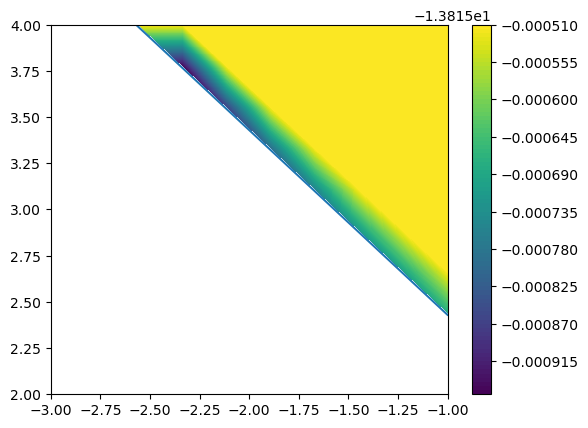

In [159]:
plt.plot(np.log10(alpha), -np.log10(alpha) + 1.43)



plt.contourf(np.log10(A), np.log10(C), np.log(Z- Z[-1,:]+1e-6), levels=100)
plt.colorbar()

plt.ylim(2,4)

plt.show()

In [142]:
print(Z- Z[-1,:])

[[-7.730932123735101e-04 -3.125307498562790e-02 -3.632326203929210e-01 -1.917147492666977e+00 -6.160295164259075e+00 -1.448883993466148e+01 -2.796161948611854e+01 -4.751816506016905e+01 -7.430214170814224e+01 -1.098951200267536e+02]
 [-2.369427399173674e-06 -8.291928592676356e-04 -3.684109282336578e-02 -4.471027311903697e-01 -2.408655603718756e+00 -7.820922905683496e+00 -1.850141564232028e+01 -3.582950019679332e+01 -6.102437433963306e+01 -9.555948563574496e+01]
 [-1.668993832026899e-10 -2.236222311324809e-06 -9.275244295849916e-04 -4.450679993790629e-02 -5.584747005520683e-01 -3.054288586590303e+00 -9.990216037063902e+00 -2.372534862731978e+01 -4.604979316824627e+01 -7.853692451658041e+01]
 [ 3.552713678800501e-15 -1.877680233519641e-10 -2.747139333791893e-06 -1.183335444338240e-03 -5.746041253620859e-02 -7.228667136698022e-01 -3.952937125464814e+00 -1.292154310147735e+01 -3.066969200742531e+01 -5.950009538630907e+01]
 [ 3.552713678800501e-15  0.000000000000000e+00 -2.024762579821981e-

In [139]:
print(Z[-1,:])

[10.607707480852437 10.499484990898772 10.434607312641251 10.395714166328602 10.37239833766882  10.358420865604138 10.350041591242089 10.34501834766644  10.341996273876703 10.335072364090536]


In [161]:
print(10**(1.43)/1e-4)

269153.48039269156


In [202]:
derivative(2, d_vec, x, 1e-4, 1e4, ML)

(array([  742.9735753395449, -1268.874267474484 ]),
 array([[     0.             ,      0.             ,      0.             ],
        [  2673.7269029621293,   1597.6994574842893,      0.             ],
        [ -3129.3892044513323, -17691.307448508003 , -17228.10530012971  ]]))

In [206]:
from derivativeintensive import *

In [209]:
alpha = 1e-4
cutoff = 5e4

In [210]:
derivative_directory(d_vec, ML, 2, alpha, cutoff)

  0%|          | 0/15 [00:00<?, ?it/s]

 47%|████▋     | 7/15 [01:23<01:35, 11.89s/it]

Unexpected exception formatting exception. Falling back to standard exception



Traceback (most recent call last):
  File "/Users/ericrechberger/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_78881/2237319739.py", line 1, in <module>
    derivative_directory(d_vec, ML, 2, alpha, cutoff)
  File "/Users/ericrechberger/Library/CloudStorage/OneDrive-UniversityofEdinburgh/MPhys project/Code/MPhys-Code/derivativeintensive.py", line 34, in derivative_directory
    derivative_array[i], g_matrices[i] = derivative(n_max, d_vec, zeros[i], alpha, cutoff, ML )
  File "/Users/ericrechberger/Library/CloudStorage/OneDrive-UniversityofEdinburgh/MPhys project/Code/MPhys-Code/derivative.py", line 220, in derivative
    FV_matrix[i,j] = deltaFV(i,j,d_vec, x, cutoff, alpha, ML)
  File "/Users/ericrechberger/Library/CloudStorage/OneDrive-UniversityofEdinburgh/MPhys project/Code/MPhys-Code/derivative.py", line 180,